In [1]:
import numpy as np
from cluster_data import ClusterData, cluster_data_to_array, normalize_data, estimate_runtime
from kmeans import k_means
from my_kmedoids import pam_clustering
from fuzzy_c_means import fuzzy_c_means
import my_kmedoids

def main():
    #Example data: list of ClusterData (3 dimensions: inc, raan, ecc)
    data_list = [
        ClusterData(inc=10.0, raan=20.0, ecc=0.1),
        ClusterData(inc=12.0, raan=22.0, ecc=0.15),
        ClusterData(inc=11.0, raan=21.0, ecc=0.12),
        ClusterData(inc=50.0, raan=60.0, ecc=0.3),
        ClusterData(inc=52.0, raan=62.0, ecc=0.35),
        ClusterData(inc=51.0, raan=61.0, ecc=0.32),
    ]
    
    # Convert the list of named tuples to a numpy array.
    data_array = cluster_data_to_array(data_list)
    
    # Normalize the data.
    normalized_data, mean, std = normalize_data(data_array)
    
    k = 2  # Number of clusters
    
    # --- K-means Clustering ---
    print("\nK-means result:")
    result_kmeans, time_kmeans = estimate_runtime(k_means, normalized_data, k, init='random')
    print("Labels:", result_kmeans.labels)
    print("Cluster centers:\n", result_kmeans.cluster_centers)
                                                      
    # --- Fuzzy C-means Clustering ---
    print("\nFuzzy C-means result:")
    result_fcm, time_fcm = estimate_runtime(fuzzy_c_means, normalized_data, k, m=2)
    print("Labels:", result_fcm.labels)
    print("Cluster centers:\n", result_fcm.cluster_centers)                                          

    # --- K-medoids (PAM) Clustering ---
    print("\nK-medoids (PAM) result:")
    result_kmedoids, time_kmedoids = estimate_runtime(pam_clustering, normalized_data, k, build_function=None, swap_function=None)
    print("Labels:", result_kmedoids.labels)
    print("here")
    print("Cluster centers:\n", result_kmedoids.cluster_centers)

    # --- K-medoids (PAM) Clustering --- FastPAM1
    print("\nK-medoids fastPAM 1 result:")
    result_kmedoids, time_kmedoids = estimate_runtime(pam_clustering, normalized_data, k, None, my_kmedoids.fastpam1_swap)
    print("Labels:", result_kmedoids.labels)
    print("Cluster centers:\n", result_kmedoids.cluster_centers) 
    
    # --- K-medoids (PAM) Clustering --- FastPAM2 and LAB Build
    print("\nK-medoids fastPAM2 + LAB-build result:")
    result_kmedoids, time_kmedoids = estimate_runtime(pam_clustering, normalized_data, k, my_kmedoids.fastpam_lab_build, my_kmedoids.fastpam2_swap)
    print("Labels:", result_kmedoids.labels)
    print("Cluster centers:\n", result_kmedoids.cluster_centers)

if __name__ == "__main__":
    main()


K-means result:
Runtime for k_means (build: default build, swap: default swap): 0.000000 seconds
Labels: [0 0 0 1 1 1]
Cluster centers:
 [[-0.99916771 -0.99916771 -0.97953472]
 [ 0.99916771  0.99916771  0.97953472]]

Fuzzy C-means result:
Runtime for fuzzy_c_means (build: default build, swap: default swap): 0.004652 seconds
Labels: [1 1 1 0 0 0]
Cluster centers:
 [[ 0.99911955  0.99911955  0.97935908]
 [-0.99921704 -0.99921704 -0.98005226]]

K-medoids (PAM) result:
Runtime for pam_clustering (build: pam_build, swap: pam_swap): 0.000000 seconds
Labels: [1 1 1 0 0 0]
here
Cluster centers:
 [[ 0.99916771  0.99916771  0.94688357]
 [-0.99916771 -0.99916771 -1.01218588]]

K-medoids fastPAM 1 result:
Runtime for pam_clustering (build: pam_build, swap: pam_swap): 0.000000 seconds
Labels: [1 1 1 0 0 0]
Cluster centers:
 [[ 0.99916771  0.99916771  0.94688357]
 [-0.99916771 -0.99916771 -1.01218588]]

K-medoids fastPAM2 + LAB-build result:
Runtime for pam_clustering (build: pam_build, swap: pam_s


K-means result:
Runtime for k_means (build: default build, swap: default swap): 0.013601 seconds
Labels: [0 0 0 ... 0 0 0]
Cluster centers:
 [[ 0.57376683 -0.32334926 -0.60331327]
 [-1.40601277  0.79236576  1.47841618]]
Runtime: 0.013601 seconds


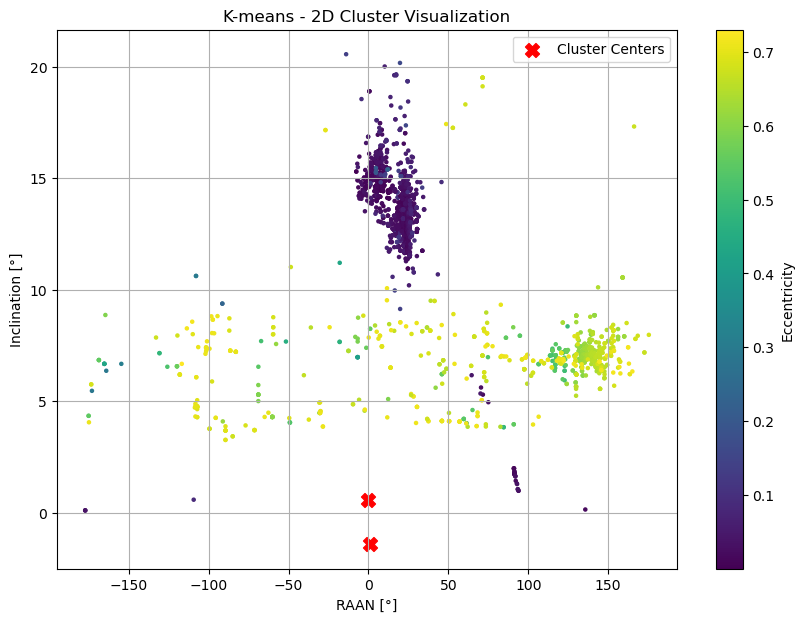

K-means runtime: 0.013601 seconds

Fuzzy C-means result:
Runtime for fuzzy_c_means (build: default build, swap: default swap): 1.947978 seconds
Labels: [0 0 0 ... 0 0 0]
Cluster centers:
 [[ 0.53160176 -0.32825841 -0.58051136]
 [-1.34580876  1.21220972  1.50456461]]
Runtime: 1.947978 seconds


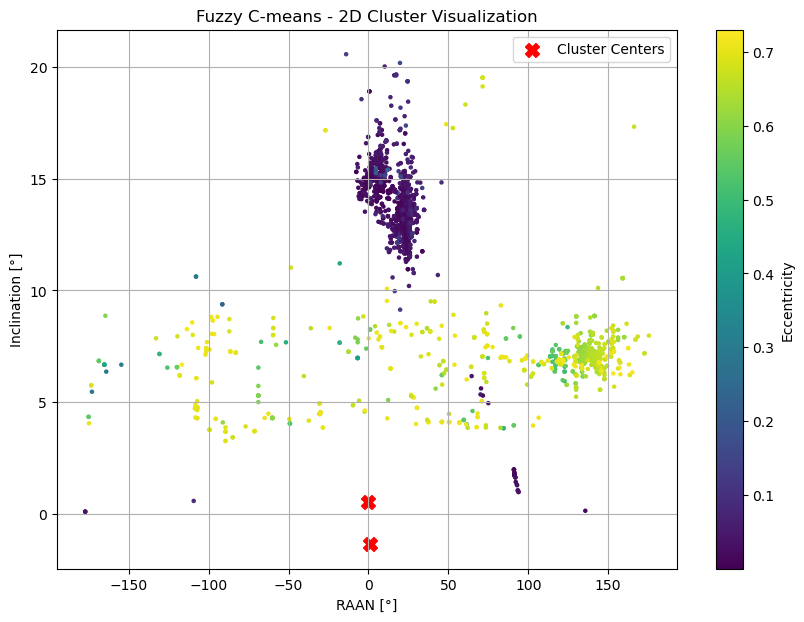

Fuzzy C-means runtime: 1.947978 seconds

K-medoids (PAM) result:
Runtime for pam_clustering (build: pam_build, swap: pam_swap): 1220.781563 seconds
Labels: [0 0 0 ... 0 0 0]
Cluster centers:
 [[ 0.48049775 -0.2489688  -0.64634575]
 [-1.28889278  1.77762574  1.47529425]]
Runtime: 1220.781563 seconds


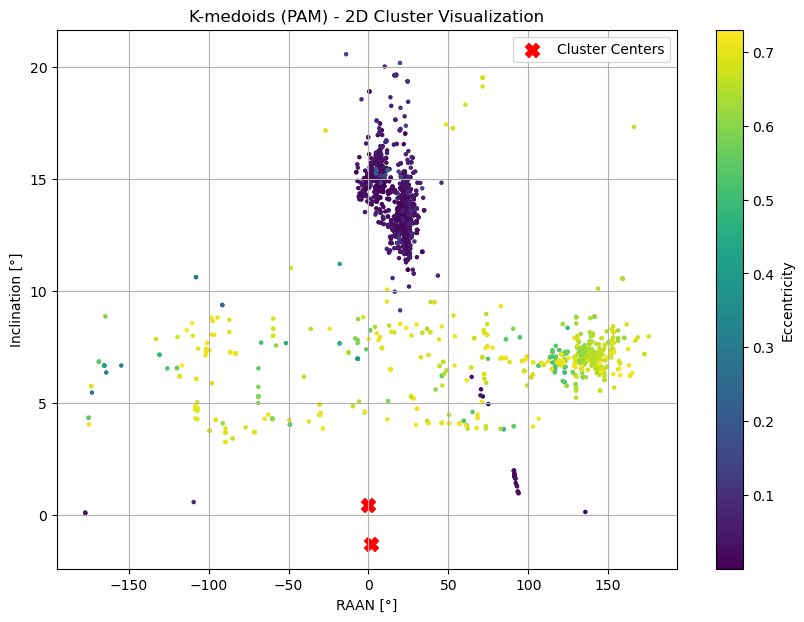

K-medoids (PAM) runtime: 1220.781563 seconds

K-medoids fastPAM1 result:


In [ ]:
import numpy as np
import cluster_data
import my_kmedoids
from cluster_plotter import ClusterPlotter
from kmeans import k_means
from fuzzy_c_means import fuzzy_c_means
from my_kmedoids import pam_clustering

# Load and preprocess data
testfile = r"../input/stat_Master_02_geo_s1.crs"
data = cluster_data.prepare_data_for_clustering(testfile)
data = np.array(data).T
normalized_data, mean, std = cluster_data.normalize_data(data)

k = 2  # Number of clusters

# Helper function for clustering and plotting
def run_clustering(algorithm, name, *args, **kwargs):
    print(f"\n{name} result:")
    result, runtime = cluster_data.estimate_runtime(algorithm, *args, **kwargs)
    print("Labels:", result.labels)
    print("Cluster centers:\n", result.cluster_centers)
    print(f"Runtime: {runtime:.6f} seconds")
    
    plotter = ClusterPlotter(data, result.labels, result.cluster_centers)
    #plotter.clusters_3d_plot(f"{name} - 3D Cluster Visualization")
    plotter.clusters_2d_plot(f"{name} - 2D Cluster Visualization")
    return result, runtime

# Run clustering algorithms
result_kmeans, time_kmeans = run_clustering(k_means, "K-means", normalized_data, k, init='random')
result_fcm, time_fcm = run_clustering(fuzzy_c_means, "Fuzzy C-means", normalized_data, k, m=2)
result_kmedoids, time_kmedoids = run_clustering(pam_clustering, "K-medoids (PAM)", normalized_data, k, build_function=None, swap_function=None)
result_fastpam1, time_fastpam1 = run_clustering(pam_clustering, "K-medoids fastPAM1", normalized_data, k, None, my_kmedoids.fastpam1_swap)
result_fastpam2, time_fastpam2 = run_clustering(pam_clustering, "K-medoids fastPAM2 + LAB-build", normalized_data, k, my_kmedoids.fastpam_lab_build, my_kmedoids.fastpam2_swap)
result_dbscan, time_dbscan = estimate_runtime(dbscan_clustering, normalized_data, eps=0.5, min_samples=5)


print("\n--- Runtime Summary ---")
print(f"K-means runtime: {time_kmeans:.6f} seconds")
print(f"Fuzzy C-means runtime: {time_fcm:.6f} seconds")
print(f"K-medoids (PAM) runtime: {time_kmedoids:.6f} seconds")
print(f"K-medoids fastPAM1 runtime: {time_fastpam1:.6f} seconds")
print(f"K-medoids fastPAM2 + LAB-build runtime: {time_fastpam2:.6f} seconds")


from cluster_data import prepare_data_for_clustering, normalize_data

testfile = "../input/stat_Master_02_geo_s1.crs"
data = prepare_data_for_clustering(testfile)
data = np.array(data).T

normalized_data, mean, std = normalize_data(data)

print("\nDBSCAN Clustering Result:")
print("Labels:", result_dbscan)

plotter = ClusterPlotter(data, result_dbscan, None)
plotter.clusters_3d_plot("DBSCAN 3D Cluster Visualization")
plotter.clusters_2d_plot("DBSCAN 2D Cluster Visualization")